In [16]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load the Data
nyc_data = pd.read_csv('AB_NYC_2019.csv')
categories = pd.read_json('CA_category_id.json')

# Display the first few rows to understand the data
print("NYC Data Preview:")
print(nyc_data.head())
print("\nCategories Data Preview:")
print(categories.head())

NYC Data Preview:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1     

In [17]:

# Step 3: Data Integrity
print("\nNYC Data Info:")
print(nyc_data.info())
print("\nCategories Data Info:")
print(categories.info())


NYC Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review     

In [18]:
# Step 4: Handling Missing Data
missing_data = nyc_data.isnull().sum()
print("\nMissing data:\n", missing_data)

# Fill missing values for 'name' and drop rows with critical missing data
nyc_data['name'].fillna('Unknown', inplace=True)
nyc_data.dropna(subset=['price', 'latitude', 'longitude'], inplace=True)


Missing data:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_10320\977467717.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc_data['name'].fillna('Unknown', inplace=True)


In [20]:
# Step 5: Duplicate Removal
duplicates = nyc_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
nyc_data = nyc_data.drop_duplicates()

# Step 6: Standardization
# Rename columns for consistency
nyc_data.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
# Standardize categorical data
nyc_data['room_type'] = nyc_data['room_type'].str.lower()


Number of duplicate rows: 0


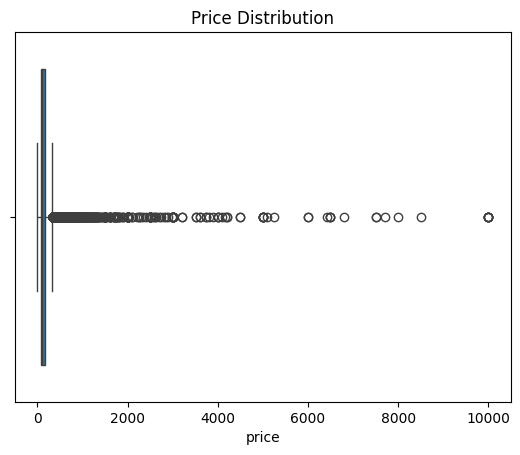

In [21]:
# Step 7: Outlier Detection and Handling
sns.boxplot(x=nyc_data['price'])
plt.title('Price Distribution')
plt.show()

# Use Z-scores for advanced outlier handling
from scipy.stats import zscore

nyc_data['price_zscore'] = zscore(nyc_data['price'])
nyc_data = nyc_data[nyc_data['price_zscore'].abs() <= 3]  # Retain rows with z-scores within [-3, 3]
nyc_data.drop(columns='price_zscore', inplace=True)


In [23]:
# Step 8: Feature Engineering
# Add a 'price_per_person' column
nyc_data['price_per_person'] = nyc_data['price'] / (nyc_data['minimum_nights'] + 1)

# Step 9: Integration of JSON Data
# Extract useful details from the JSON dataset
categories_flat = pd.json_normalize(categories['items'])
categories_flat = categories_flat[['id', 'snippet.title']].rename(columns={'id': 'category_id', 'snippet.title': 'category_name'})
print("\nFlattened Categories Data:")
print(categories_flat.head())


Flattened Categories Data:
  category_id     category_name
0           1  Film & Animation
1           2  Autos & Vehicles
2          10             Music
3          15    Pets & Animals
4          17            Sports


In [24]:
# Step 10: Save the Cleaned Data
cleaned_file_path = '/mnt/data/cleaned_nyc_data.csv'
nyc_data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved as '{cleaned_file_path}'.")

Cleaned data saved as '/mnt/data/cleaned_nyc_data.csv'.
